This is a simple analysis of day returns vs overnight returns in the stock market. It is hypothesised that during market closures greater returns occur due to the risk of being unable to sell securities.  

In [31]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import matplotlib.dates as mdates
style.use ('ggplot')

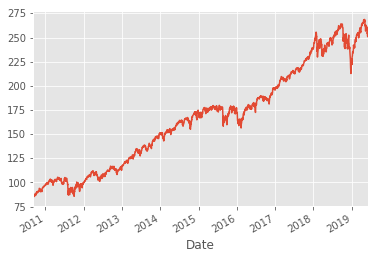

In [32]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,6,6)
df = web.DataReader('VOO','yahoo',start,end)
df.to_csv('VOO.csv')
df = pd.read_csv('VOO.csv', parse_dates = True, index_col=0)
df['Adj Close'].plot()

In [35]:
df['daypricechange'] = df['Close'] - df['Open']

In [36]:
df['nightpricechange'] = df['Open'] - df['Close'].shift(1)

In [8]:
df['DayReturnPercent'] = df['daypricechange']/df['Open']
df['NightReturnPercent'] = df['nightpricechange']/df['Close'].shift(1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,daypricechange,nightpricechange,DayReturnPercent,NightReturnPercent
Date,,,,,,,,,,
2010-09-09,102.500000,101.139999,102.500000,101.320000,26500.0,84.338600,-1.180000,NaN,-0.011512,NaN
2010-09-10,101.860001,101.300003,101.680000,101.779999,8600.0,84.721527,0.099998,0.360001,0.000983,0.003553
2010-09-13,103.139999,102.500000,102.959999,103.059998,33700.0,85.786987,0.099998,1.180000,0.000971,0.011594
2010-09-14,103.480003,102.379997,102.839996,103.040001,59400.0,85.770348,0.200005,-0.220001,0.001945,-0.002135
2010-09-15,103.379997,102.400002,102.620003,103.300003,9200.0,85.986740,0.680000,-0.419998,0.006626,-0.004076


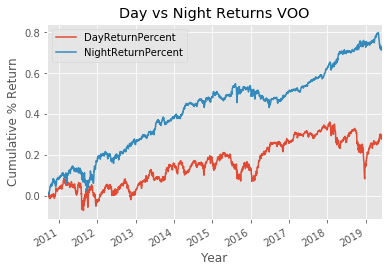

In [30]:
df.DayReturnPercent.cumsum().plot(grid = True)
df.NightReturnPercent.cumsum().plot(grid = True)
plt.title("Day vs Night Returns VOO")
plt.xlabel("Year")
plt.ylabel("Cumulative % Return")
plt.legend()

In [12]:
print(df.DayReturnPercent.sum())
print(df.NightReturnPercent.sum())

0.2968286398667151
0.7286790464819279


It can be seen that the in this case the hypothesis was correct and the additional incurred risk was rewarded with higher return. The fact this security has only been in existance during a bull market is significant and this theory needs to be checked in a greater number of market conditions. Furthermore, trading costs would likely derail any possible strategy that could be derived from this however it serves as an interesting case study for long only day traders who clearly do not have the advantage some believe they do.

The code uses webreader and is easily tweaked to examime any security available by altering lines 10,11 and 12 then re-running the whole code.